In [1]:
library(ROCR)
library(boot)
library(data.table)



Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [2]:
files <- c("/home/cmb-panasas2/wenzhenl/benchmark/exon_level/hg38/SRP010679_human/ROC_input.txt",
           "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/hg38/SRP029589_human//ROC_input.txt",
            "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/hg38/SRP063852_human/ROC_input.txt",
            "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/hg38/SRP098789_human/ROC_input.txt",
            "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/hg38/SRP102021_human/ROC_input.txt",
           "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/mm10/SRP003554_mouse/ROC_input.txt",
           "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/mm10/SRP062407_mouse/ROC_input.txt",
           "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/mm10/SRP078005_mouse/ROC_input.txt",
           "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/mm10/SRP091889_mouse/ROC_input.txt",
           "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/mm10/SRP115915_mouse/ROC_input.txt"       
          )

In [3]:
length(files)

[1] 10

In [4]:
fc <- function(datasets, datasets_index){
    toRead <- datasets[datasets_index]
    data <- read.table(toRead[1], header=T)
    
    for (fp in toread[2:length(toRead)])
    {
        dataT <- read.table(fp, header=TRUE)
        data <- rbind(data, dataT)
    }
    
    cop <- prediction(data[['ribocop']], data$truth)
    cop <- performance(cop, 'f')
    xvalues <- cop@x.values[[1]]
    yvalues <- cop@y.values[[1]]
    cutoff <- xvalues[which.max(yvalues)]
    return (cutoff)
}

In [5]:
fc <- function(datasets, datasets_index){
    toRead <- datasets[datasets_index]
    data <- read.table(toRead[1], header=T)
    
    for (fp in toRead[2:length(toRead)])
    {
        dataT <- read.table(fp, header=TRUE)
        data <- rbind(data, dataT)
    }
    
    cop <- prediction(data[['ribocop']], data$truth)
    cop <- performance(cop, 'f')
    xvalues <- cop@x.values[[1]]
    yvalues <- cop@y.values[[1]]
    cutoff <- xvalues[which.max(yvalues)]
    return (cutoff)
}

In [6]:
set.seed(42)
boostrap.results <- boot(data = files, statistic = fc, R = 1000, parallel = "multicore", ncpus=16)


In [123]:
summary(boostrap.results)

          Length Class  Mode     
t0           1   -none- numeric  
t         1000   -none- numeric  
R            1   -none- numeric  
data        10   -none- character
seed       626   -none- numeric  
statistic    1   -none- function 
sim          1   -none- character
call         6   -none- call     
stype        1   -none- character
strata      10   -none- numeric  
weights     10   -none- numeric  

In [ ]:
hist(boostrap.results$t, xlab="phase score", breaks=15, xaxt='n', main="", cex.lab=1.6, cex.axis=1.6, cex.main=1.6, cex.sub=1.6)# las=1)
#xaxt='n')
title("")
axis(side=1, at=seq(0.33, 0.49, 0.02), labels=seq(0.33, 0.49, 0.02))

abline(v=cutoff3, col='red', lwd=2, lty=2)
abline(v=mean(boostrap.results$t)+sd(boostrap.results$t), col='black', lwd=2, lty=3)
abline(v=mean(boostrap.results$t)-sd(boostrap.results$t), col='black', lwd=2, lty=3)
legend("topright", legend=c("ribotricer default", "95% CI"),lty=2:3, lwd=2,
       col=c("red", "black"),  cex=1.6)

# Remove SRP029859 

In [2]:
files <- c("/home/cmb-panasas2/wenzhenl/benchmark/exon_level/hg38/SRP010679_human/ROC_input.txt",
            "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/hg38/SRP063852_human/ROC_input.txt",
            "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/hg38/SRP098789_human/ROC_input.txt",
            "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/hg38/SRP102021_human/ROC_input.txt",
           "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/mm10/SRP003554_mouse/ROC_input.txt",
           "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/mm10/SRP062407_mouse/ROC_input.txt",
           "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/mm10/SRP078005_mouse/ROC_input.txt",
           "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/mm10/SRP091889_mouse/ROC_input.txt",
           "/home/cmb-panasas2/wenzhenl/benchmark/exon_level/mm10/SRP115915_mouse/ROC_input.txt"       
          )
fc <- function(datasets, datasets_index){
    toRead <- datasets[datasets_index]
    data <- fread(toRead[1])
    
    for (fp in toRead[2:length(toRead)])
    {
        dataT <- fread(fp)
        data <- rbind(data, dataT)
    }
    
    cop <- prediction(data[['ribocop']], data$truth)
    cop <- performance(cop, 'f')
    xvalues <- cop@x.values[[1]]
    yvalues <- cop@y.values[[1]]
    cutoff <- xvalues[which.max(yvalues)]
    return (cutoff)
}
set.seed(42)
boostrap.results.removed <- boot(data = files, statistic = fc, R = 50000, parallel = "multicore", ncpus=16)


In [3]:
range(boostrap.results.removed$t)

[1] 0.37500 0.57802

In [4]:
mean(boostrap.results.removed$t) + sd(boostrap.results.removed$t)

[1] 0.4695895

In [5]:
mean(boostrap.results.removed$t) - sd(boostrap.results.removed$t)

[1] 0.4190794

In [6]:
mean(boostrap.results.removed$t)

[1] 0.4443345

In [7]:
cutoff3 <- 0.428571428571

In [9]:
pdf('bootstrap_phase_score_dist_50k.pdf')
hist(boostrap.results.removed$t, breaks=15, xaxt='n',  xlab="phase score", main="", cex.lab=1.6, cex.axis=1.6, cex.main=1.6, cex.sub=1.6)# las=1)
#xaxt='n')
title("")
axis(side=1, at=seq(0.37, 0.58, 0.02), labels=seq(0.37, 0.58, 0.02))

abline(v=cutoff3, col='red', lwd=2, lty=2)
abline(v=mean(boostrap.results.removed$t)+sd(boostrap.results.removed$t), col='black', lwd=2, lty=3)
abline(v=mean(boostrap.results.removed$t)-sd(boostrap.results.removed$t), col='black', lwd=2, lty=3)
legend("topright", legend=c("ribotricer default", "95% CI"),lty=2:3, lwd=2,
       col=c("red", "black"),  cex=1.6)
dev.off()

png 
  2

In [150]:
pdf('hist_20000.pdf')
hist(boostrap.results.removed$t, breaks=15, xaxt='n', main="")# las=1)
#xaxt='n')
title("")
axis(side=1, at=seq(0.36, 0.58, 0.02), labels=seq(0.36, 0.58, 0.02))

abline(v=cutoff3, col='red', lwd=2, lty=2)
abline(v=mean(boostrap.results.removed$t)+sd(boostrap.results.removed$t), col='black', lwd=2, lty=3)
abline(v=mean(boostrap.results.removed$t)-sd(boostrap.results.removed$t), col='black', lwd=2, lty=3)
legend("topright", legend=c("ribotricer default", "95% CI"),lty=2:3, lwd=2,
       col=c("red", "black"),  cex=0.8)
dev.off()

png 
  2

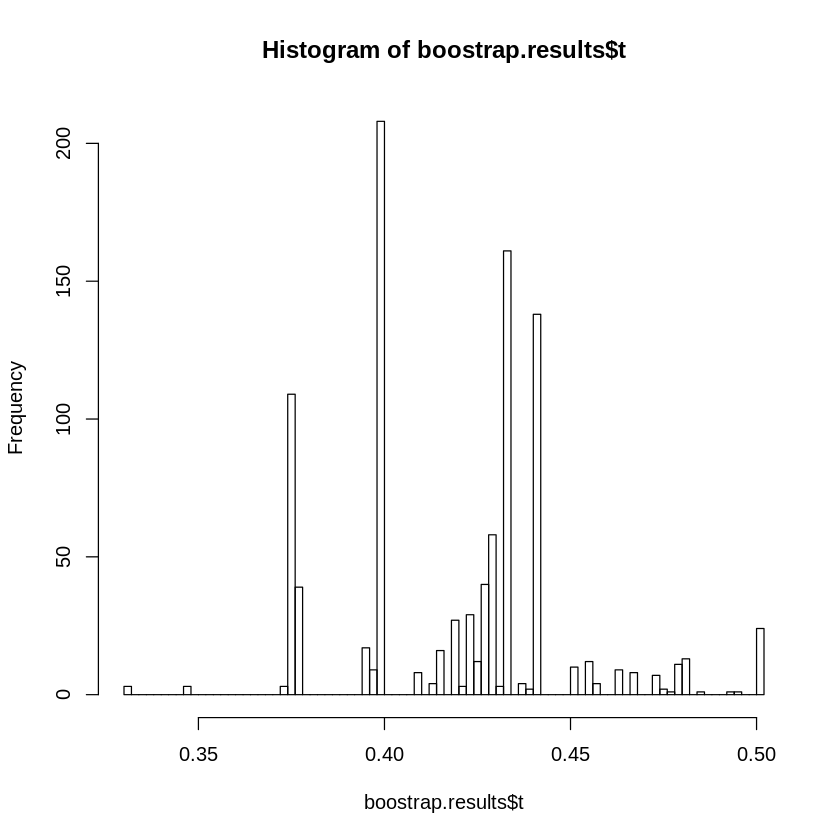

In [133]:
hist(boostrap.results$t, breaks=100)

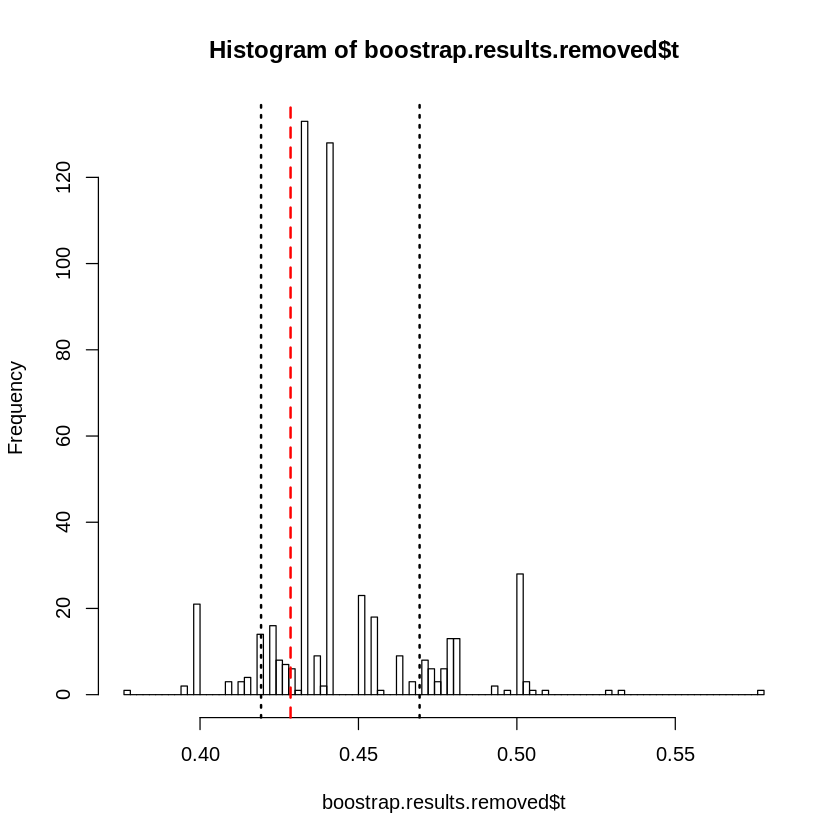

In [137]:
hist(boostrap.results.removed$t, breaks=100)
abline(v=cutoff3, col='red', lwd=2, lty=2)
abline(v=mean(boostrap.results.removed$t)+sd(boostrap.results.removed$t), col='black', lwd=2, lty=3)
abline(v=mean(boostrap.results.removed$t)-sd(boostrap.results.removed$t), col='black', lwd=2, lty=3)

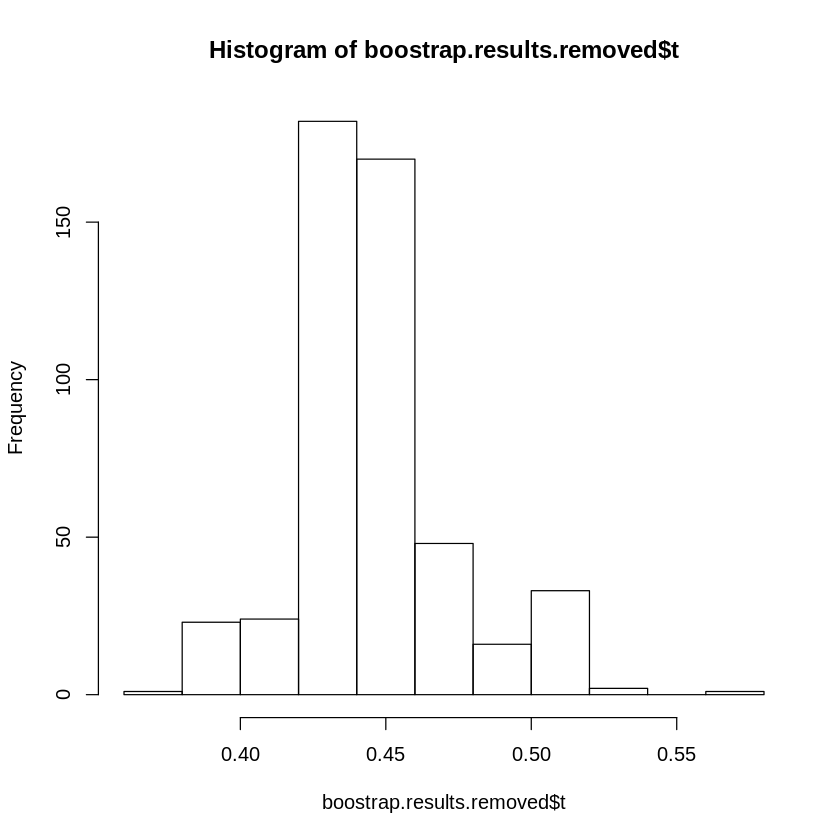

In [130]:
hist(boostrap.results.removed$t)

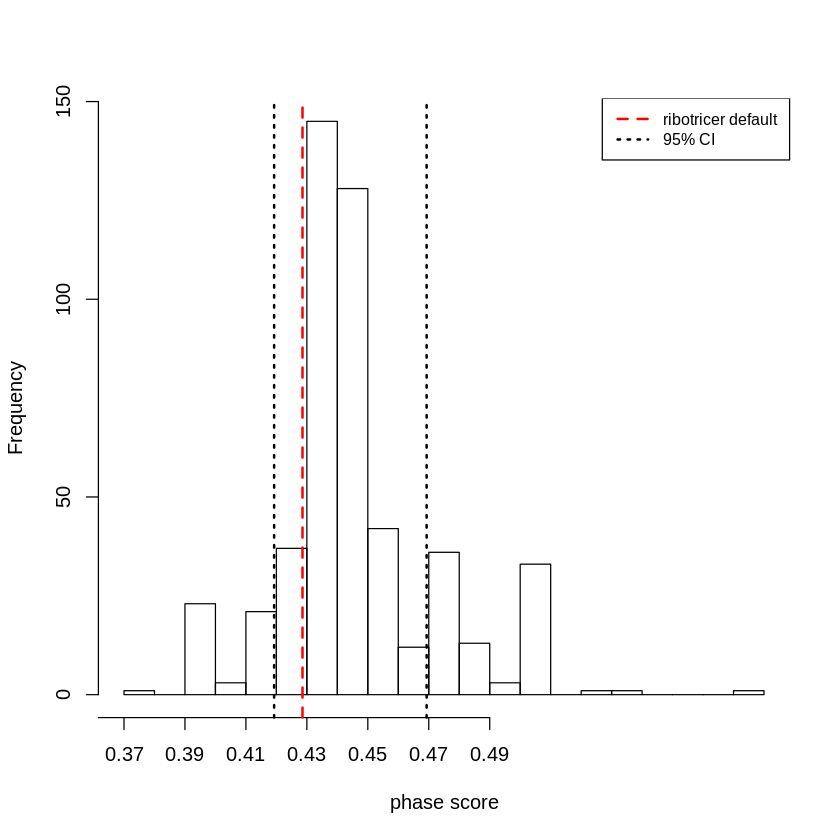

In [129]:
hist(boostrap.results.removed$t, xlab="phase score", breaks=15, xaxt='n', main="")# las=1)
#xaxt='n')
title("")
axis(side=1, at=seq(0.33, 0.49, 0.02), labels=seq(0.33, 0.49, 0.02))

abline(v=cutoff3, col='red', lwd=2, lty=2)
abline(v=mean(boostrap.results.removed$t)+sd(boostrap.results.removed$t), col='black', lwd=2, lty=3)
abline(v=mean(boostrap.results.removed$t)-sd(boostrap.results.removed$t), col='black', lwd=2, lty=3)
legend("topright", legend=c("ribotricer default", "95% CI"),lty=2:3, lwd=2,
       col=c("red", "black"),  cex=0.8)

In [39]:
mean(boostrap.results$t) - boostrap.results$t0


[1] -0.0131417

In [40]:
mean(boostrap.results$t)

[1] 0.415007

In [41]:
sd(boostrap.results$t)

[1] 0.02979528

In [80]:
range(boostrap.results$t)

[1] 0.3306964 0.4802393

In [117]:
mean(boostrap.results$t) + sd(boostrap.results$t)

[1] 0.4448023

In [118]:
mean(boostrap.results$t) - sd(boostrap.results$t)

[1] 0.3852117

In [ ]:
c(0.33, 0.40, 0.42, 0.44, 0.46, 0.48)

In [116]:
pdf('bootstrap_phase_score_dist.pdf')
hist(boostrap.results$t, xlab="phase score", breaks=15, xaxt='n', main="")# las=1)
#xaxt='n')
title("")
axis(side=1, at=seq(0.33, 0.49, 0.02), labels=seq(0.33, 0.49, 0.02))

abline(v=cutoff3, col='red', lwd=2, lty=2)
abline(v=mean(boostrap.results$t)+sd(boostrap.results$t), col='black', lwd=2, lty=3)
abline(v=mean(boostrap.results$t)-sd(boostrap.results$t), col='black', lwd=2, lty=3)
legend("topright", legend=c("ribotricer default", "95% CI"),lty=2:3, lwd=2,
       col=c("red", "black"),  cex=0.8)
dev.off()

png 
  2

In [42]:
cutoff1 <- mean(boostrap.results$t) + 0.0297952786906729

In [43]:
cutoff2 <- mean(boostrap.results$t) - 0.0297952786906729

In [45]:
cutoff3 <- 0.428571428571

In [53]:
fc.cutoff3 <- function(datasets, datasets_index){
    toRead <- datasets[datasets_index]
    data <- read.table(toRead[1], header=T)
    
    for (fp in toRead[2:length(toRead)])
    {
        dataT <- read.table(fp, header=TRUE)
        data <- rbind(data, dataT)
    }
    
    rna = data[data$truth == 0, ]
    ribo = data[data$truth == 1, ]
    
    tp = nrow(ribo[ribo$ribocop >= cutoff3, ])
    fp = nrow(rna[rna$ribocop >= cutoff3, ])
    
    tn = nrow(rna[rna$ribocop <= cutoff3, ])
    fn = nrow(ribo[ribo$ribocop <= cutoff3, ])
    
    fscore = 2*tp/(2*tp+fp+fn)
    
    #ribocop_rna = rna[order(-rna$ribocop), ]    
    
    ribocop_positive = nrow(ribo[ribo$ribocop >= cutoff3, ])


    #cop <- prediction(data[['ribocop']], data$truth)
    #cop <- performance(cop, 'f')
    #xvalues <- cop@x.values[[1]]
    #yvalues <- cop@y.values[[1]]
    #cutoff <- xvalues[which.max(yvalues)]
    
    return (fscore)
}
boostrap.results3 <- boot(data = files, statistic = fc.cutoff3, R = 100, parallel = "multicore", ncpus=32)


In [54]:
fc.cutoff1 <- function(datasets, datasets_index){
    toRead <- datasets[datasets_index]
    data <- read.table(toRead[1], header=T)
    
    for (fp in toRead[2:length(toRead)])
    {
        dataT <- read.table(fp, header=TRUE)
        data <- rbind(data, dataT)
    }
    
    rna = data[data$truth == 0, ]
    ribo = data[data$truth == 1, ]
    
     tp = nrow(ribo[ribo$ribocop >= cutoff1, ])
    fp = nrow(rna[rna$ribocop >= cutoff1, ])
    
    tn = nrow(rna[rna$ribocop <= cutoff1, ])
    fn = nrow(ribo[ribo$ribocop <= cutoff1, ])
    
    fscore = 2*tp/(2*tp+fp+fn)
    
    
    return (fscore)
}
boostrap.results1 <- boot(data = files, statistic = fc.cutoff1, R = 100, parallel = "multicore", ncpus=32)


In [55]:
fc.cutoff2 <- function(datasets, datasets_index){
    toRead <- datasets[datasets_index]
    data <- read.table(toRead[1], header=T)
    
    for (fp in toRead[2:length(toRead)])
    {
        dataT <- read.table(fp, header=TRUE)
        data <- rbind(data, dataT)
    }
    
    rna = data[data$truth == 0, ]
    ribo = data[data$truth == 1, ]
    
    tp = nrow(ribo[ribo$ribocop >= cutoff2, ])
    fp = nrow(rna[rna$ribocop >= cutoff2, ])
    
    tn = nrow(rna[rna$ribocop <= cutoff2, ])
    fn = nrow(ribo[ribo$ribocop <= cutoff2, ])
    
    fscore = 2*tp/(2*tp+fp+fn)
    
    
    
    return (fscore)
}
boostrap.results2 <- boot(data = files, statistic = fc.cutoff2, R = 100, parallel = "multicore", ncpus=16)


In [61]:
print(c(mean(boostrap.results3$t), sd(boostrap.results3$t)))

[1] 0.88784219 0.02020144


In [62]:
print(c(mean(boostrap.results1$t), sd(boostrap.results1$t)))

[1] 0.88698352 0.02421732


In [63]:
print(c(mean(boostrap.results2$t), sd(boostrap.results2$t)))

[1] 0.8840567 0.0163281


In [ ]:
data =